<a href="https://colab.research.google.com/github/kangdh9447/MLP/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. data loading

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_file/Social_Network_Ads.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. data 전처리, Feature 추출

In [406]:
data = data[['Age', 'EstimatedSalary', 'Purchased']]
data = data.values  # numpy로 변환

# Feature 추출
X = data[:, :2]               # -> Age, EstimatedSalary
y = data[:, 2].reshape(-1,1)  # -> Purchased

# 3. 학습 데이터 분할 및 정규화

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train = 학습할 데이터(320개)
# X_test = 검증할 데이터(80개)

# data 정규화
X_train = (X_train - np.mean(X, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X, axis=0)) / np.std(X_test, axis=0)

# bias 추가
X_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

# 4. 로지스틱 회귀 모델 구성

In [408]:
# 시그모이드 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 손실 함수
def cost_function(X, y, w):
    m = len(y)
    p = sigmoid(X @ w)
    cost = -1/m * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    return cost

# 경사 하강법
def gradient_descent(X, y, alpha, epochs):
    m, n = X.shape
    w = np.ones([3, 1])
    cost_history = []

    for i in range(epochs):
        p = sigmoid(X @ w)
        gradient = (X.T @ (p - y)) / m
        w -= alpha * gradient
        cost = cost_function(X, y, w)
        cost_history.append(cost)

    return w, cost_history

# 5. 경사하강법을 이용한 모델 학습 및 파라미터 출력

파라미터 구하기

In [409]:
alpha = 0.01   # learning rate
epochs = 100000
w, cost_history = gradient_descent(X_bias, y_train, alpha, epochs)

print(f"w0 (bias): {w[0, 0]:.4f}")
print(f"w1 (Age): {w[1, 0]:.4f}")
print(f"w2 (EstimatedSalary): {w[2, 0]:.4f}")

w0 (bias): -1.1153
w1 (Age): 2.4484
w2 (EstimatedSalary): 1.3427


# 6. 모델의 시각화

1-Training Data

클래스 나누기

In [410]:
C1 = np.where(y_train == True)[0]   # y_train이 true(=1)인 인덱스 값을 return
C0 = np.where(y_train == False)[0]  # y_train이 false(=0)인 인덱스 값을 return

c = np.empty([320,1])
c[C1] = 1
c[C0] = 0

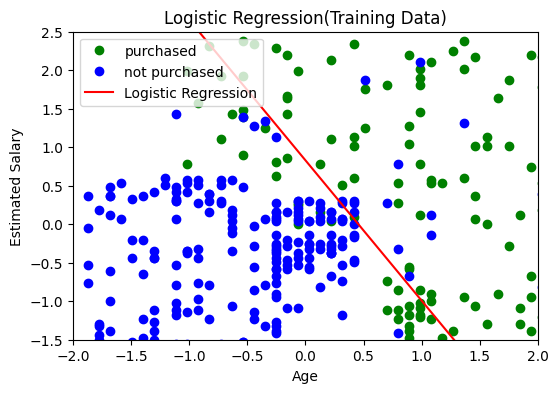

In [411]:
xp = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 320)
yp = -w[1]/w[2] * xp - w[0]/w[2]

# 학습 데이터 분포도
plt.figure(figsize = (6, 4))
plt.plot(X_train[C1, 0], X_train[C1, 1], 'go', label = 'purchased')
plt.plot(X_train[C0, 0], X_train[C0, 1], 'bo', label = 'not purchased')

plt.plot(xp, yp, 'r-', label = 'Logistic Regression')

plt.title('Logistic Regression(Training Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(-2.0, 2.0)
plt.ylim(-1.5, 2.5)
plt.legend(loc=2)
plt.show()

2-Test Data

In [412]:
C1 = np.where(y_test == True)[0]   # y_test가 true(=1)인 인덱스 값을 return
C0 = np.where(y_test == False)[0]  # y_test가 false(=0)인 인덱스 값을 return

c = np.empty([80,1])
c[C1] = 1
c[C0] = 0

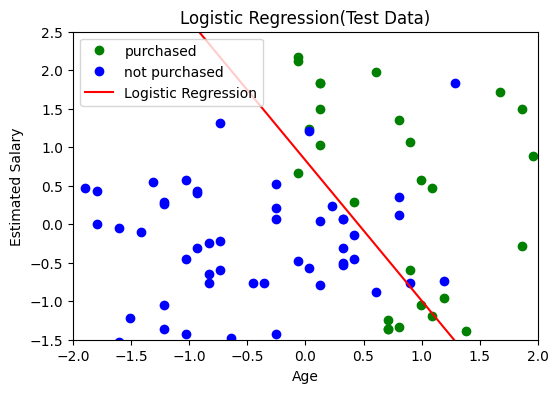

In [413]:
xp = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 80)
yp = -w[1]/w[2] * xp - w[0]/w[2]

# 학습 데이터 분포도
plt.figure(figsize = (6, 4))
plt.plot(X_test[C1, 0], X_test[C1, 1], 'go', label = 'purchased')
plt.plot(X_test[C0, 0], X_test[C0, 1], 'bo', label = 'not purchased')

plt.plot(xp, yp, 'r-', label = 'Logistic Regression')

plt.title('Logistic Regression(Test Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(-2.0, 2.0)
plt.ylim(-1.5, 2.5)
plt.legend(loc=2)
plt.show()

# 7. scikit-learn Library를 이용한 모델 학습

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression(solver = 'lbfgs')
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [415]:
clf.coef_         # w1, w2

array([[2.22284909, 1.21545691]])

In [416]:
clf.intercept_    # w0

array([-1.05533533])

In [417]:
C1 = np.where(y_train == True)[0]
C0 = np.where(y_train == False)[0]

c = np.empty([320,1])
c[C1] = 1
c[C0] = 0

# 8. 모델의 시각화

1-Training Data

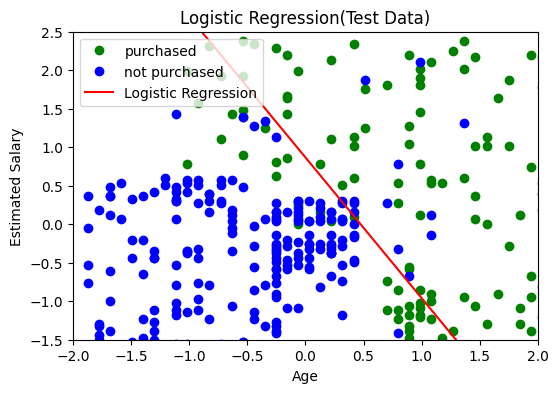

In [418]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 80)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(X_train[C1, 0], X_train[C1, 1], 'go', label = 'purchased')
plt.plot(X_train[C0, 0], X_train[C0, 1], 'bo', label = 'not purchased')
plt.plot(xp, yp, 'r-', label = 'Logistic Regression')
plt.title('Logistic Regression(Test Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(-2.0, 2.0)
plt.ylim(-1.5, 2.5)
plt.legend(loc=2)
plt.show()

2-Test Data

In [419]:
C1 = np.where(y_test == True)[0]
C0 = np.where(y_test == False)[0]

c = np.empty([80,1])
c[C1] = 1
c[C0] = 0

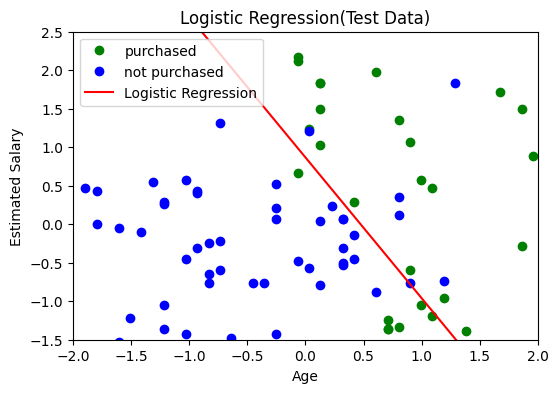

In [420]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 80)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(X_test[C1, 0], X_test[C1, 1], 'go', label = 'purchased')
plt.plot(X_test[C0, 0], X_test[C0, 1], 'bo', label = 'not purchased')
plt.plot(xp, yp, 'r-', label = 'Logistic Regression')
plt.title('Logistic Regression(Test Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(-2.0, 2.0)
plt.ylim(-1.5, 2.5)
plt.legend(loc=2)
plt.show()